# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

I initially think the *Random Forest Classifier* model will perform better because we are only trying to predict a binary case and Random forests are well suited for determining binary cases.

## Split the Data into Training and Testing Sets

In [3]:
# Create the labels set `y` and features DataFrame `X`
X = data.drop('spam', axis=1)
y = data['spam']

In [4]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [7]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
4576,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.131,0.000,0.0,0.000,0.0,1.488,5,64
4401,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,1.571,5,11
3707,0.17,0.0,0.17,0.0,0.00,0.0,0.0,0.0,0.8,0.0,...,0.0,0.253,0.168,0.084,0.0,0.024,0.0,4.665,81,1031
2362,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,4.228,53,148
1537,0.00,0.0,0.00,0.0,2.17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,1.333,5,16


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [8]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fit the Standard Scaler with the training data
scaler = scaler.fit(X_train)

In [10]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)

In [11]:
X_test_scaled = scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [16]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state=1)


lr_model = logistic_regression_model.fit(X_train_scaled,y_train)

lr_model

LogisticRegression(random_state=1)

In [17]:
# Validate the model
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9295652173913044
Testing Data Score: 0.9278887923544744


In [18]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = lr_model.predict(X_test_scaled)
# Review the predictions
testing_predictions

array([0, 0, 1, ..., 0, 0, 1])

In [24]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

lr_score = accuracy_score(y_test,testing_predictions)
lr_score

0.9278887923544744

## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [20]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
rf_model = clf.fit(X_train_scaled,y_train)

rf_model

RandomForestClassifier(random_state=1)

In [21]:
# Validate the model
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9997101449275362
Testing Data Score: 0.9669852302345786


In [22]:
# Make and save testing predictions with the saved logistic regression model using the test data
rf_testing_predictions = rf_model.predict(X_test_scaled)
# Review the predictions
rf_testing_predictions


array([1, 1, 1, ..., 1, 0, 1])

In [25]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
rf_score = accuracy_score(y_test,rf_testing_predictions)
rf_score

0.9669852302345786

In [26]:
lr_score = lr_score * 100
rf_score = rf_score * 100

if lr_score > rf_score:
    print(f'The logistic model at {lr_score}%, performed better than the random forest classifier at {rf_score}%.')
elif lr_score < rf_score:
    print(f'The random forest classifier at {rf_score}%, performed better than the logistic model at {lr_score}%.')
else:
    print(f'The logistic model at {lr_score}%, is equal to the random forest classifier at {rf_score}%.')

The random forest classifier at 96.69852302345787%, performed better than the logistic model at 92.78887923544744%.


In [35]:
# plot both the predictions to see how they perform

#create dataframes for the arrays
testing_predictions_df = pd.DataFrame({'testing_predictions': testing_predictions})
rf_testing_predictions_df = pd.DataFrame({'rf_testing_predictions': rf_testing_predictions})

#concat them to a new dataframe with the y_testing results
evaluate_df = pd.concat([y_test,testing_predictions_df,rf_testing_predictions_df], axis=1)


evaluate_df

,spam,testing_predictions,rf_testing_predictions
1351,1.0,NaN,NaN
1687,1.0,NaN,NaN
1297,1.0,NaN,NaN
2101,0.0,NaN,NaN
3920,0.0,NaN,NaN
...,...,...,...
1145,NaN,0.0,0.0
1146,NaN,1.0,1.0
1148,NaN,0.0,1.0
1149,NaN,0.0,0.0


<Axes: ylabel='Frequency'>

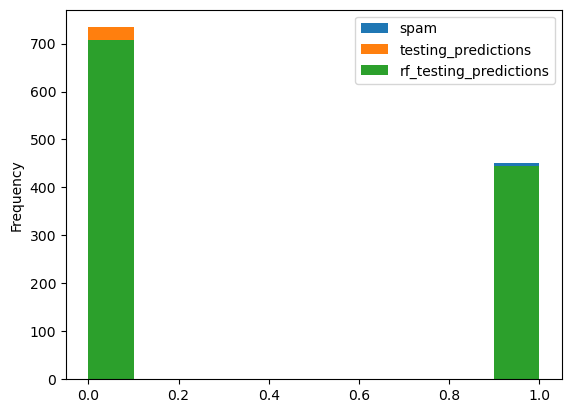

In [49]:
#plot 
import matplotlib.pyplot as plt

evaluate_df_sorted = evaluate_df.sort_index()
evaluate_df_sorted.plot(kind='hist')

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*
>* The random forest classifier at 96.69852302345787%, performed better than the logistic model at 92.78887923544744%.
